In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error

In [48]:
data = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [49]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower())
data.columns = cols

In [50]:
data._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [51]:
data.select_dtypes('object')

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [52]:
data.isna().sum()/len(data)*100

customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

In [53]:
pd.DataFrame(data.isna().sum()/len(data)).reset_index()

,index,0
0,customer,0.0
1,state,0.0
2,customer lifetime value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective to date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [54]:
nulls = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls.columns = ['column_name','percent_nulls']

In [55]:
nulls['percent_nulls'] >= 0.05

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
Name: percent_nulls, dtype: bool

In [56]:
nulls[nulls['percent_nulls'] >= 0.05]

,column_name,percent_nulls


In [57]:
drop_columns = nulls[nulls['percent_nulls'] >= 0.05]['column_name'].values

In [58]:
pd.to_datetime(data['effective to date'],errors='coerce')

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective to date, Length: 9134, dtype: datetime64[ns]

In [59]:
data['effective to date'] = pd.to_datetime(data['effective to date'],errors='coerce')

In [60]:
data['effective to date'][0].month

2

In [61]:
data['column_month'] = list(map(lambda x: x.month ,data['effective to date']))

In [62]:
data['column_month'].value_counts()

1    4898
2    4236
Name: column_month, dtype: int64

In [63]:
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,column_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [64]:
sales_channel = []
response = []

for channels in data['Sales Channel'].unique():
    sales_channel.append(channels)
    filtered = data[(data['Sales Channel'] == channels)]
    
total_response = filtered['Response'].count()
yes_response = filtered['Response'].value_counts()['Yes']

percentage = yes_response / total_response * 100

response.append(percentage)

KeyError: 'Sales Channel'

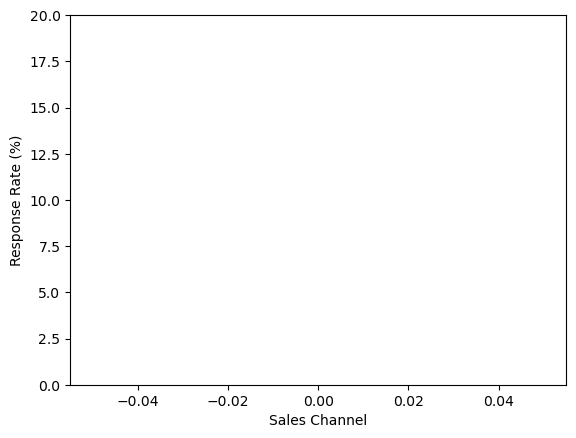

In [65]:
plt.bar(x=sales_channel, height=response)
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.ylim(0, 20)
plt.show()

In [66]:
median_income = data['Total Claim Amount'].median()
claim = pd.cut(data['Total Claim Amount'], bins=[0, median_income, float('inf')], labels=['Low Claim', 'High Claim'])

KeyError: 'Total Claim Amount'

In [67]:
response_rates = data.groupby(claim)['Response'].value_counts(normalize=True).loc[:, 'Yes'] * 100

NameError: name 'claim' is not defined

In [68]:
plt.figure(figsize=(8, 6))
response_rates.plot(kind='bar')
plt.title('Response Rate by Claim')
plt.xlabel('Claim')
plt.ylabel('Response Rate (%)')
plt.show()

NameError: name 'response_rates' is not defined

<Figure size 800x600 with 0 Axes>

In [69]:
income = data['Income'].median()
claim = pd.cut(data['Income'], bins=[0, income, float('inf')], labels=['Low Income', 'High Income'])

KeyError: 'Income'

In [ ]:
response_rates = data.groupby(claim)['Response'].value_counts(normalize=True).loc[:, 'Yes'] * 100

In [ ]:
plt.figure(figsize=(8, 6))
response_rates.plot(kind='bar')
plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Response Rate (%)')
plt.show()

In [ ]:
numerical = data._get_numeric_data()
numerical.columns

In [ ]:
categorical = data.select_dtypes(include='object')
categorical.columns

In [ ]:
fig, axis = plt.subplots(2,4, figsize=(12,7))

sns.histplot(data['Customer Lifetime Value'].values, kde=True, ax = axis[0,0]).set_xlabel('Customer Lifetime Value')

sns.histplot(data['Income'].values, kde=True, ax = axis[0,1]).set_xlabel('Income')

sns.histplot(data['Monthly Premium Auto'].values, kde=True, ax = axis[0,2]).set_xlabel('Monthly Premium Auto')

sns.histplot(data['Months Since Last Claim'].values, kde=True, ax = axis[0,3]).set_xlabel('Months Since Last Claim')

sns.histplot(data['Months Since Policy Inception'].values, kde=True, ax = axis[1,0]).set_xlabel('Months Since Policy Inception')

sns.histplot(data['Number of Open Complaints'].values, kde=True, ax = axis[1,1]).set_xlabel('Number of Open Complaints')

sns.histplot(data['Number of Policies'].values, kde=True, ax = axis[1,2]).set_xlabel('Number of Policies')

sns.histplot(data['Total Claim Amount'].values, kde=True, ax = axis[1,3]).set_xlabel('Total Claim Amount')

plt.tight_layout()

In [ ]:
sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":8})
plt.show()

In [ ]:
corr_matrix = data.corr()

In [ ]:
np.log(data['Customer Lifetime Value'])

In [ ]:
data['Customer Lifetime Value log'] = np.log(data['Customer Lifetime Value'])

In [ ]:
sns.histplot(data['Customer Lifetime Value log'])
plt.show()

In [ ]:
stats.boxcox(data['Customer Lifetime Value'])

In [ ]:
arr, lmbda = stats.boxcox(data['Customer Lifetime Value'])

In [ ]:
sns.histplot(arr)
plt.show()

In [ ]:
np.log(data['Income'])

In [ ]:
len(data[data['Income'] < 0])

In [ ]:
np.where(data['Income'] < 0, 0, data['Income'])

In [ ]:
data['Income_temp'] = np.where(data['Income'] < 0, 0, data['Income'])

In [ ]:
data['Income_temp'].replace(0, data['Income_temp'].mean(), inplace=True)

In [ ]:
stats.boxcox(data['Income_temp'])

In [ ]:
arr, lmbda = stats.boxcox(data['Income_temp'])

In [ ]:
sns.histplot(arr)
plt.show()

In [ ]:
stats.boxcox(data['Monthly Premium Auto'])

In [ ]:
arr, lmbda = stats.boxcox(data['Monthly Premium Auto'])

In [ ]:
sns.histplot(arr)
plt.show()

In [ ]:
len(data[data['Total Claim Amount'] <= 0])

In [ ]:
stats.boxcox(data['Total Claim Amount'])

In [ ]:
arr, lmbda = stats.boxcox(data['Total Claim Amount'])

In [ ]:
sns.histplot(arr)
plt.show()

In [ ]:
def label_encoder(data):
    data_copy = data.copy()
    for i in data.columns:
        data_copy[i] = LabelEncoder().fit(data_copy[i]).transform(data_copy[i])
    return data_copy

In [ ]:
data_copy = label_encoder(data)

In [ ]:
Y = pd.read_csv('Y_data.csv')
Y = Y.drop(['Unnamed: 0'],axis=1)

In [ ]:
numerical_x = pd.read_csv('numerical_data.csv').drop(['Total Claim Amount'],axis=1)

In [ ]:
numerical_x.columns

In [ ]:
np.concatenate((numerical_x,data_copy), axis=1)

In [ ]:
pd.DataFrame(np.concatenate((numerical_x,data_copy), axis=1))

In [ ]:
X = pd.DataFrame(np.concatenate((numerical_x,data_copy), axis=1))

In [ ]:
train_test_split(X,Y,test_size=0.4,random_state=100)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [ ]:
model = sm.OLS(y_train,x_train).fit()

In [ ]:
X.to_csv('final_data.csv')
Y.to_csv('final_Y.csv')

In [ ]:
predictions = model.predict(x_test)

In [ ]:
Lreg = LinearRegression().fit(x_train, y_train)

In [ ]:
predictions = Lreg.predict(x_test)

In [ ]:
r2 = r2_score(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test,predictions)

In [ ]:
rmse = math.sqrt(mse)

In [ ]:
mae = mean_absolute_error(y_test, predictions)

In [ ]:
r2

In [ ]:
mse

In [ ]:
rmse